# Snake Classifier
Can classify 13 different types od snakes The types are following:

1. Python
2. Rattle
3. Cobra
4. Anaconda
5. Black Mamba
6. King Cobra
7. Coral Snake
8. Water Snake
9.  Sea Snake
10. Bushmaster
11. Rat Snake
12. Parot Snake
13. Lora

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.8 MB/s eta 0:00:00


In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/DataScience/Image_Recognizer/

/content/drive/My Drive/DataScience/Image_Recognizer


In [ ]:
doc(search_images_ddg)

In [ ]:
snake_labels = [
    "Python",
    "Rattle",
    "Cobra",
    "Anaconda",
    "Black Mamba",
    "King Cobra",
    "Coral Snake",
    "Water Snake",
    "Sea Snake",
    "Bushmaster",
    "Rat Snake",
    "Parot Snake",
    "Lora"


]
len(snake_labels)

13

In [ ]:
images = search_images_ddg(snake_labels[0])
f"No OF Images => {len(images)} -- One Image URL => {images[0]}"

'No OF Images => 200 -- One Image URL => https://mongabay-images.s3.amazonaws.com/768/animals/animals_154198.jpg'

In [ ]:
doc(download_url)

In [ ]:
dest = "p2.jpg"
download_url(images[0], dest, show_progress=False)

Path('p2.jpg')

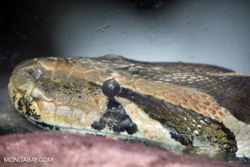

In [ ]:
image = Image.open(dest)
image.to_thumb(250,250)

In [ ]:
data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for snake_type in snake_labels:

  dest = f"{data_path}/{snake_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    snake_type_image_urls = search_images_ddg(snake_type)
    download_images(dest, urls = snake_image_urls)
  except:
    continue

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#938) [Path('data/Python/cb2ee878-8c00-4fa4-b5cd-7ffbda62ecf7.jpg'),Path('data/Python/3e409b74-0d35-4b9d-8e94-07200921df3d.jpg'),Path('data/Python/cb4fa665-4d11-4da4-ad8c-e6d516e134ec.jpg'),Path('data/Python/f002c0ed-1242-406a-9231-ba3d72396938.jpg'),Path('data/Python/3bd77f03-c3ed-43be-afea-a725142ccfaf.jpg'),Path('data/Python/3bfb6d17-4899-4982-b730-0f981629c3f3.jpg'),Path('data/Python/ead50809-079f-42c0-9dc4-f8a080f68070.jpg'),Path('data/Python/289de93c-1a9d-4665-8f50-f100f738ccd3.jpg'),Path('data/Python/28bead10-0501-4501-82e9-908824a6d5dc.jpg'),Path('data/Python/03dc9f52-4ca0-42a1-875c-4f723177d381.jpg')...]

In [ ]:
failed = verify_images(image_counts)
failed

(#0) []

In [ ]:
failed.map(Path.unlink)

(#0) []

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(150))


In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


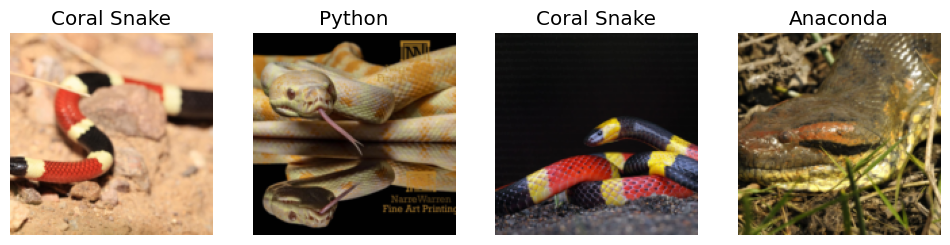

In [ ]:
dls.train.show_batch(max_n=4,nrows=1)

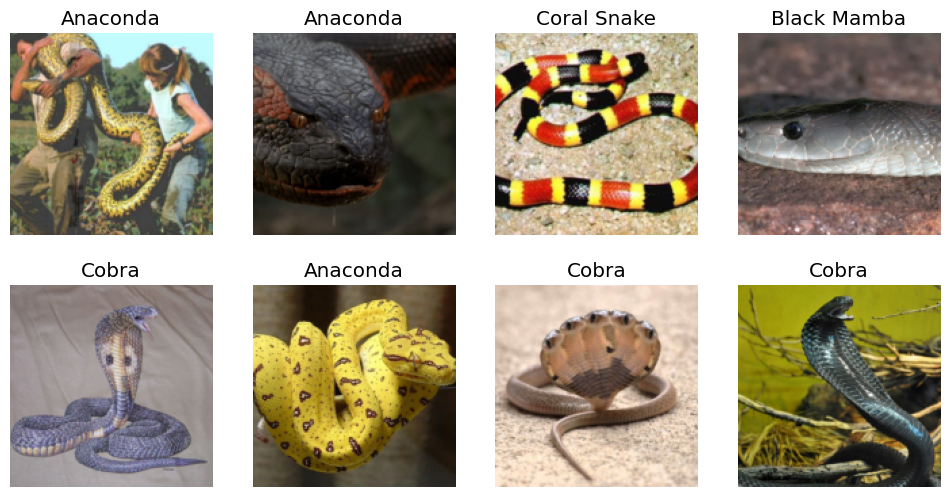

In [ ]:
dls.valid.show_batch(max_n=10,nrows=2)

In [ ]:
doc(aug_transforms)

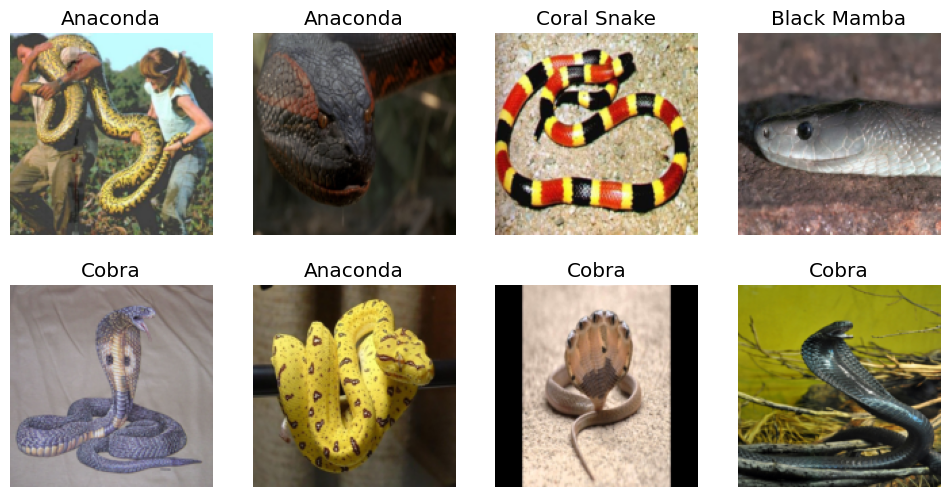

In [ ]:
dblock = dblock.new(item_tfms=Resize(150, ResizeMethod.Squish))
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=8, nrows=2)

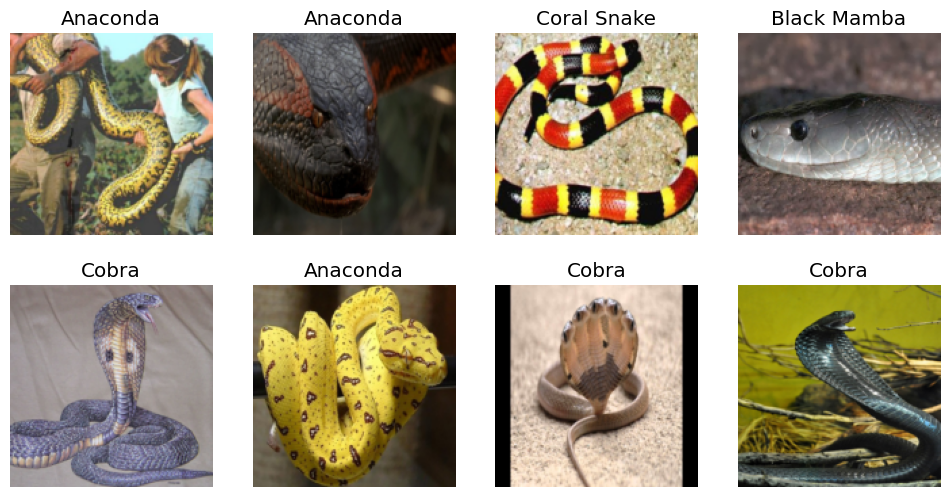

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(150, min_scale=0.3))
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=8, nrows=2)

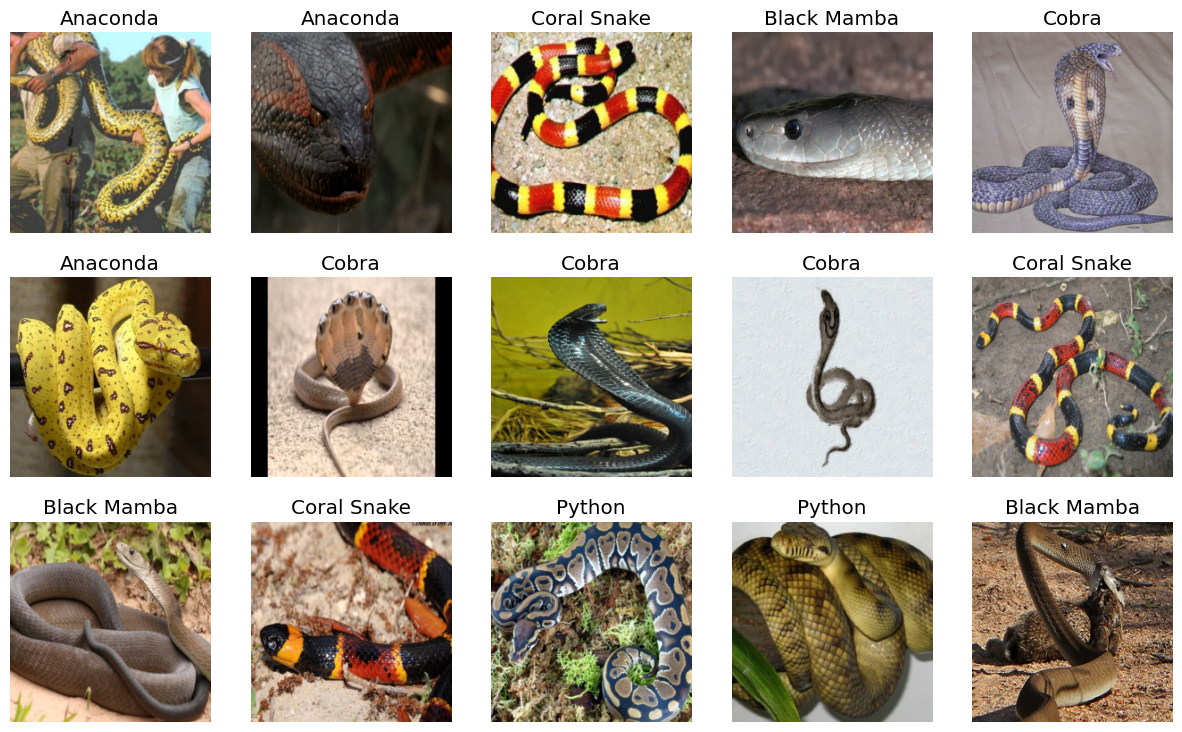

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(225, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=15, nrows=3)

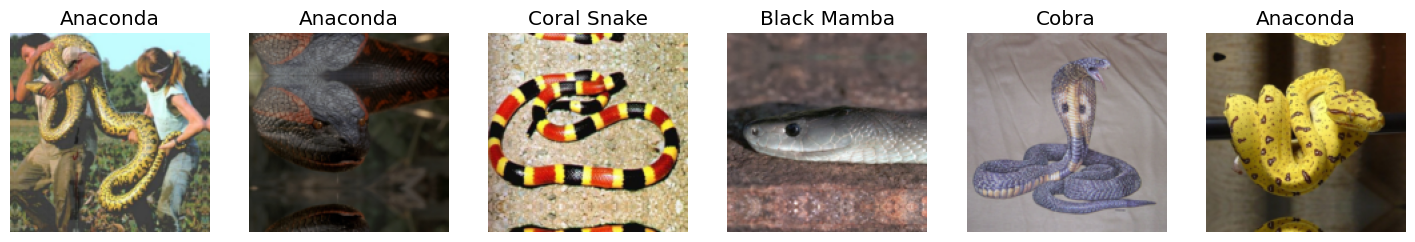

In [ ]:
dblock = dblock.new(item_tfms=Resize(150, ResizeMethod.Pad))
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=6, nrows=1)

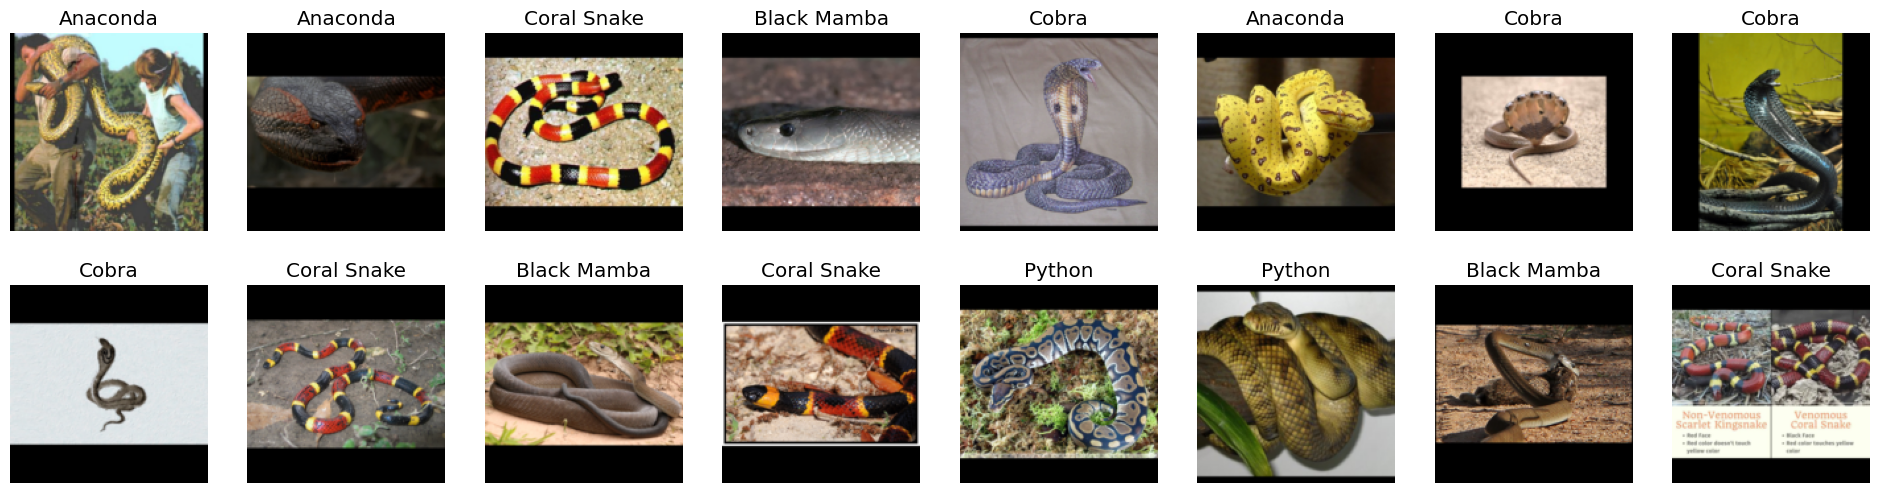

In [ ]:
dblock = dblock.new(item_tfms=Resize(150, ResizeMethod.Pad, pad_mode='zeros'))
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=16, nrows=2)

# Training & Data Cleaning

In [ ]:
model_path = "models"

In [ ]:
model = vision_learner(dls, resnet34, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 187MB/s]


In [ ]:
model.fine_tune(5)

In [ ]:
model.save(f"snake-dataloaders-v1.pkl")

Path('models/snake-dataloaders-v1.pkl.pth')

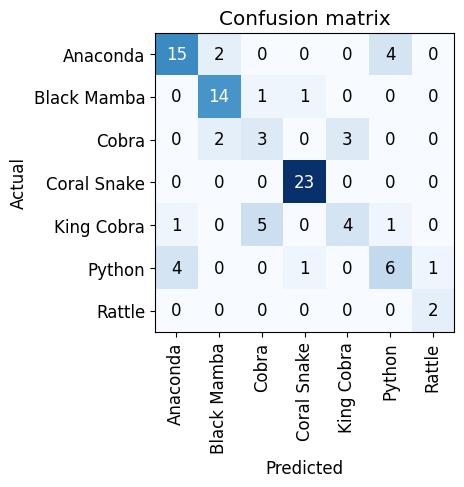

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

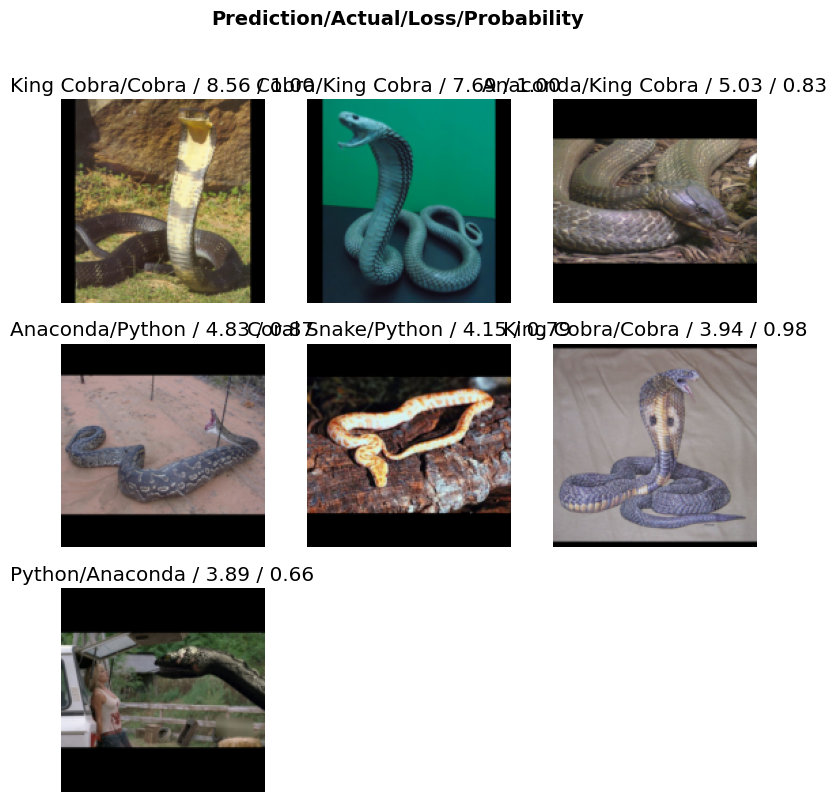

In [ ]:
interp.plot_top_losses(7, nrows=3)